In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from numpy import std, mean, sqrt, median

In [3]:
data = pd.read_csv('data_2017_2021.csv')

For this data, I compare the distribution of normalized gain and final grade between students in traditional classes and in classes taught with a combination of Peer Instruction and Just in Time Teaching, two teaching methodologies that promote students' active participation in classes. I also compare the distribution of these variables between men and women within each methodology.

In order to compare the distributions, I adapted a relative distribution method. (https://onlinelibrary.wiley.com/doi/abs/10.1111/0081-1750.00042)

In [59]:
# Creating the discrete relative distribution function
def rel_disc ( x_ref, x, n, ax = None ):
    if ax is None:
        ax  = plt.gca()
        
    quantiles = np.quantile( x_ref, np.linspace(0,1,n+1) )
    (counts, bins) = np.histogram( x, 
                 np.concatenate( ([-np.inf, quantiles[0]], quantiles[1:]+1e-10, [np.inf] ) )
                )
    counts = 100*counts / np.size(x)

    ax.bar(
        x=np.linspace(-1/n,1+1/n,n+2,endpoint=False), 
        height=counts, width=1/n, 
        align='edge',
        tick_label=[""] + ["%0.2f" % x_i for x_i in bins[1:-1] ],
        linewidth=1, edgecolor='white'
    )
    ax.plot( [0,1], [100/n, 100/n], 'k-' )
    ax.axis( xmin = -1/n, xmax = 1+1/n, ymin=0, ymax=25)

# Traditional method vs Peer Instruction

Comparing normalized gain between students of the two teaching methodolody. The traditional methodology is labeled "T" and the active methodology is labeled "PI + JiTT"

In [5]:
data[(data.method == 'T') | (data.method == 'PI + JiTT')].groupby('method')['normalized_gain'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
PI + JiTT,257.0,0.291904,0.214111,-0.166667,0.130435,0.28,0.454545,0.952381
T,355.0,0.216380,0.225512,-0.750000,0.080000,0.20,0.347826,0.933333


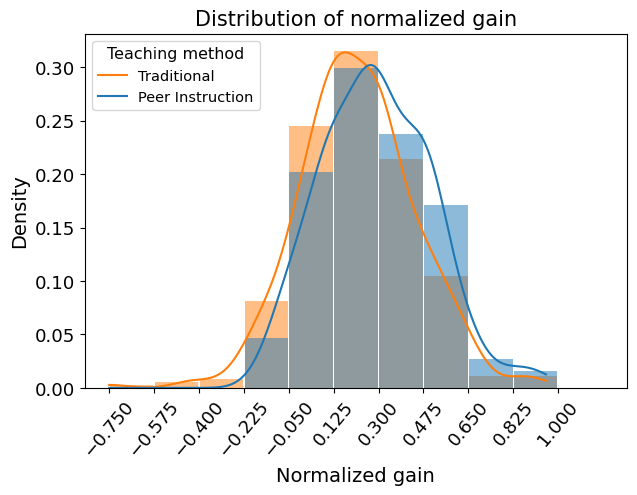

In [80]:
plt.figure(figsize=(7,4.6))
hist = sns.histplot(data=data[(data.method == 'T') | (data.method == 'PI + JiTT')], x="normalized_gain", hue="method", binwidth=0.175,
                    binrange=[-0.75,1], common_norm=False, stat='probability', legend=False,  kde=True, kde_kws={'bw_adjust' : 1 }, 
                    linewidth=0, fill=True, multiple='layer', shrink=0.97)
plt.title('Distribution of normalized gain', fontsize=15)
plt.xticks(np.arange(-0.75, 1.00000001, step=0.175))
plt.xlabel("Normalized gain", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(title='Teaching method', title_fontsize=11.5, labels=['Traditional', 'Peer Instruction'], fontsize=10.5, loc='upper left')
plt.tick_params(axis='x', labelsize=13, labelrotation=50)
plt.tick_params(axis='y', labelsize=13)

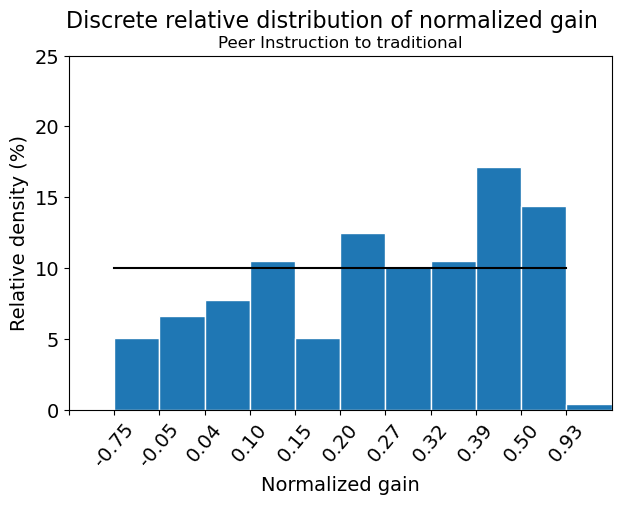

In [60]:
plt.figure(figsize=(7,4.6))
rel_disc( data[(data.method == 'T') & ~data.normalized_gain.isna() ]['normalized_gain'], 
         data[(data.method == 'PI + JiTT') & ~data.normalized_gain.isna() ]['normalized_gain'], 10)
plt.suptitle('Discrete relative distribution of normalized gain', fontsize=16)
plt.title( 'Peer Instruction to traditional', fontsize=12)
plt.xlabel("Normalized gain", fontsize=14)
plt.ylabel("Relative density (%)", fontsize=14)
plt.tick_params(axis='x', labelsize=14, labelrotation=50)
plt.tick_params(axis='y', labelsize=14)

Comparing the final grade between students of the two teaching methods.

In [6]:
data[(data.method == 'T') | (data.method == 'PI + JiTT')].groupby('method')['final_grade'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
PI + JiTT,467.0,61.374732,25.298282,0.0,46.0,65.0,78.5,100.0
T,930.0,57.612903,27.242930,0.0,40.0,63.0,76.0,100.0


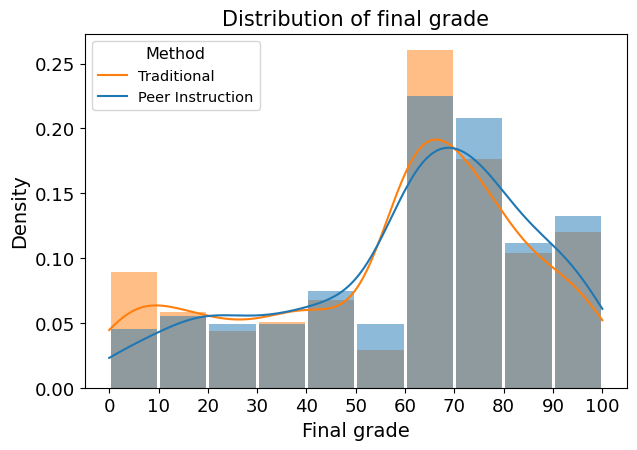

In [79]:
plt.figure(figsize=(7,4.6))
hist = sns.histplot(data=data[(data.method == 'T') | (data.method == 'PI + JiTT')], x="final_grade", hue="method", binwidth=10, binrange=[0,100],
                    common_norm=False, stat='probability', legend=False,  kde=True, kde_kws={'bw_adjust' : 1 }, linewidth=0, fill=True, 
                    multiple='layer', shrink=0.94)
#plt.suptitle('Por método, separado em faixas de 0.75', fontsize='medium')
plt.title('Distribution of final grade', fontsize=15)
plt.xticks(np.arange(0, 100.0000001, step=10))
plt.xlabel("Final grade", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(title='Method', title_fontsize=11.5, labels=['Traditional', 'Peer Instruction'], fontsize=10.5, loc='upper left')
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)

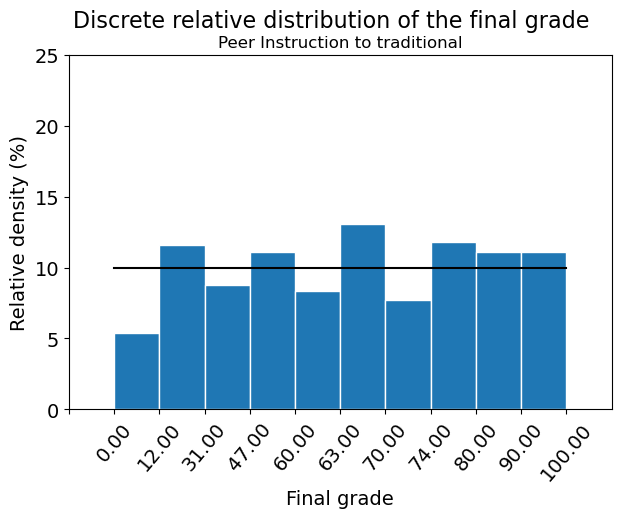

In [78]:
plt.figure(figsize=(7,4.6))
rel_disc( data[(data.method == 'T') & ~data.final_grade.isna() ]['final_grade'], 
         data[(data.method == 'PI + JiTT') & ~data.final_grade.isna() ]['final_grade'], 10)
plt.suptitle('Discrete relative distribution of the final grade', fontsize=16)
plt.title('Peer Instruction to traditional', fontsize=12)
plt.xlabel("Final grade", fontsize=14)
plt.ylabel("Relative density (%)", fontsize=14)
plt.tick_params(axis='x', labelsize=14, labelrotation=50)
plt.tick_params(axis='y', labelsize=14)
plt.show()

# Gender

Now, I compare male and female students for both methodologies

In [70]:
data[(data.method == 'T') | (data.method == 'PI + JiTT')].groupby(['method', 'gender'])['normalized_gain'].describe()

count      mean       std       min       25%       50%  \
method    gender                                                            
PI + JiTT F       109.0  0.250932  0.203126 -0.105263  0.111111  0.240000   
          M       146.0  0.324289  0.217473 -0.166667  0.171875  0.315789   
T         F       114.0  0.164612  0.177804 -0.266667  0.045455  0.139610   
          M       239.0  0.239826  0.241781 -0.750000  0.102632  0.250000   

                       75%       max  
method    gender                      
PI + JiTT F       0.411765  0.750000  
          M       0.474790  0.952381  
T         F       0.288750  0.608696  
          M       0.375000  0.933333

In [12]:
data[(data.method == 'T') | (data.method == 'PI + JiTT')].groupby(['method', 'gender'])['final_grade'].describe()

count       mean        std  min    25%   50%   75%    max
method    gender                                                            
PI + JiTT F       172.0  61.052326  25.289959  0.0  44.75  64.0  77.0  100.0
          M       289.0  61.647059  25.421721  0.0  49.00  66.0  79.0  100.0
T         F       296.0  55.709459  27.646743  0.0  36.75  60.5  75.0  100.0
          M       621.0  58.605475  26.989196  0.0  40.00  64.0  77.0  100.0

## Traditional

Comparing male and female students in traditional classes

In [7]:
cyan='#17bbcc'

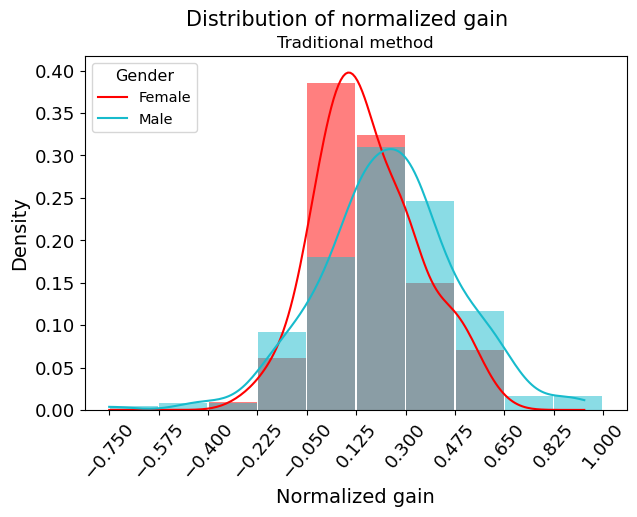

In [81]:
plt.figure(figsize=(7,4.6))
hist = sns.histplot( data[(data.method == 'T')], x="normalized_gain", hue="gender", hue_order=['M', 'F'], binwidth=0.175, common_norm=False, 
                    stat='probability', legend=False,  kde=True, kde_kws={'bw_adjust' : 1 }, linewidth=0, fill=True, multiple='layer',
                    shrink=0.97, palette=[cyan, 'red'])
plt.title('Traditional method', fontsize=12)
plt.suptitle('Distribution of normalized gain', fontsize=15)
plt.xticks(np.arange(-0.75, 1.00000001, step=0.175))
plt.xlabel("Normalized gain", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(title='Gender', title_fontsize=11.5, labels=['Female', 'Male'], fontsize=10.5, loc='upper left')
plt.tick_params(axis='x', labelsize=13, labelrotation=50)
plt.tick_params(axis='y', labelsize=13)

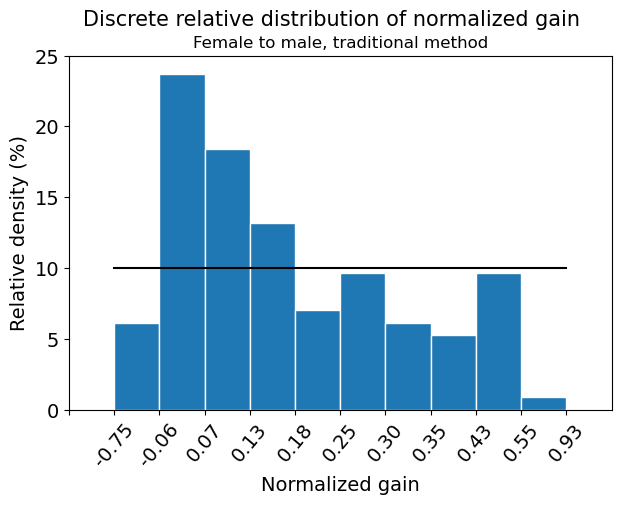

In [62]:
plt.figure(figsize=(7,4.6))
rel_disc( ( data[(data.method == 'T') & (data.gender == 'M') & ~data.normalized_gain.isna()] )['normalized_gain'],
          ( data[(data.method == 'T') & (data.gender == 'F') & ~data.normalized_gain.isna()] )['normalized_gain'], 10 )
plt.suptitle('Discrete relative distribution of normalized gain', fontsize=15)
plt.title('Female to male, traditional method', fontsize=12)
plt.xlabel("Normalized gain", fontsize=14)
plt.ylabel("Relative density (%)", fontsize=14)
plt.tick_params(axis='x', labelsize=14, labelrotation=50)
plt.tick_params(axis='y', labelsize=14)

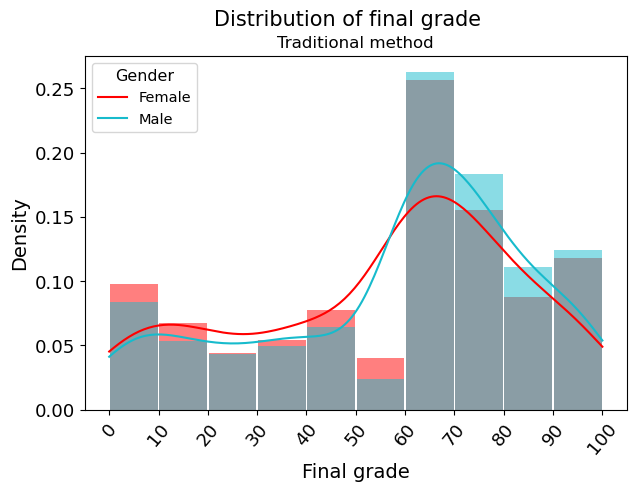

In [82]:
plt.figure(figsize=(7,4.6))
hist = sns.histplot(data[(data.method == 'T')], x="final_grade", hue="gender", hue_order=['M', 'F'], binwidth=10, binrange=[0,100],
                    common_norm=False, stat='probability', legend=False, kde=True, kde_kws={'bw_adjust' : 1 }, linewidth=0, fill=True, 
                    multiple='layer', shrink=0.97, palette=[cyan, 'red'])
plt.title('Traditional method', fontsize=12)
plt.suptitle('Distribution of final grade', fontsize=15)
plt.xticks(np.arange(0, 100.0000001, step=10))
plt.xlabel("Final grade", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(title='Gender', title_fontsize=11.5, labels=['Female', 'Male'], fontsize=10.5, loc='upper left')
plt.tick_params(axis='x', labelsize=13, labelrotation=50)
plt.tick_params(axis='y', labelsize=13)

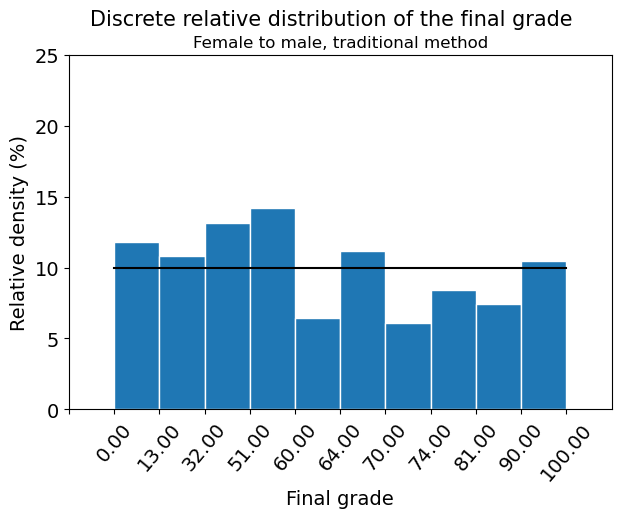

In [83]:
plt.figure(figsize=(7,4.6))
rel_disc( ( data[(data.method == 'T') & (data.gender == 'M') & ~data.final_grade.isna()] )['final_grade'],
          ( data[(data.method == 'T') & (data.gender == 'F') & ~data.final_grade.isna()] )['final_grade'], 10 )
plt.suptitle('Discrete relative distribution of the final grade', fontsize=15)
plt.title('Female to male, traditional method', fontsize=12)
plt.xlabel("Final grade", fontsize=14)
plt.ylabel("Relative density (%)", fontsize=14)
plt.tick_params(axis='x', labelsize=14, labelrotation=50)
plt.tick_params(axis='y', labelsize=14)

## Peer Instruction

Comparing male and female students in active engagement classes

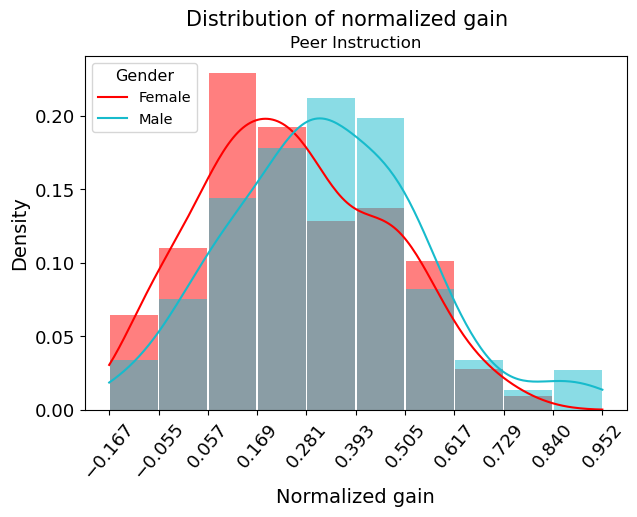

In [85]:
plt.figure(figsize=(7,4.6))
hist = sns.histplot(data[(data.method == 'PI + JiTT')], x="normalized_gain", hue="gender", binwidth=0.1119048, binrange=[-0.166667, 0.952381], 
                    common_norm=False, stat='probability', legend=False,  kde=True, kde_kws={'bw_adjust' : 1 }, linewidth=0, fill=True, 
                    multiple='layer', shrink=0.97, palette=[cyan, 'red'])
plt.title('Peer Instruction', fontsize=12)
plt.suptitle('Distribution of normalized gain', fontsize=15)
plt.xticks(np.arange(-0.166667, 1, step=0.1119))
plt.xlabel("Normalized gain", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(title='Gender', title_fontsize=11.5, labels=['Female', 'Male'], fontsize=10.5, loc='upper left')
plt.tick_params(axis='x', labelsize=13, labelrotation=50)
plt.tick_params(axis='y', labelsize=13)

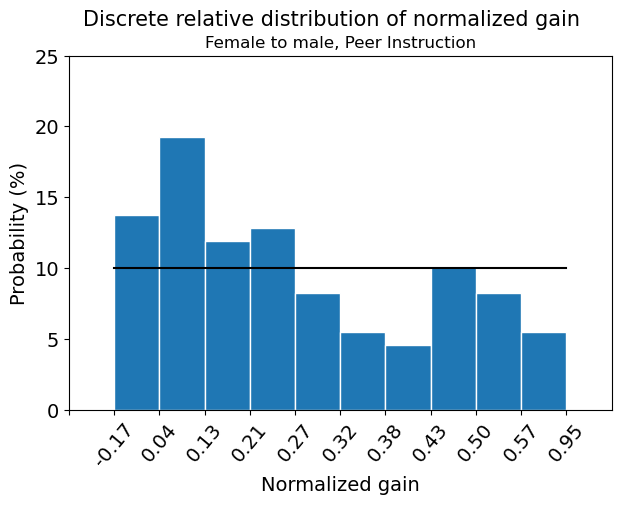

In [17]:
plt.figure(figsize=(7,4.6))
rel_disc( ( data[(data.method == 'PI + JiTT') & (data.gender == 'M') & ~data.normalized_gain.isna()] )['normalized_gain'],
          ( data[(data.method == 'PI + JiTT') & (data.gender == 'F') & ~data.normalized_gain.isna()] )['normalized_gain'], 10 )
plt.suptitle('Discrete relative distribution of normalized gain', fontsize=15)
plt.title('Female to male, Peer Instruction', fontsize=12)
plt.xlabel("Normalized gain", fontsize=14)
plt.ylabel("Probability (%)", fontsize=14)
plt.tick_params(axis='x', labelsize=14, labelrotation=50)
plt.tick_params(axis='y', labelsize=14)

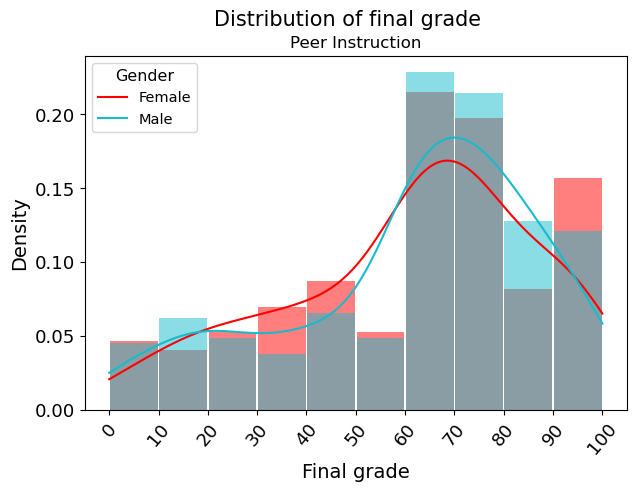

In [86]:
plt.figure(figsize=(7,4.6))
hist = sns.histplot(data[(data.method == 'PI + JiTT')], x="final_grade", hue="gender", binwidth=10, binrange=[0,100], common_norm=False, 
                    stat='probability', legend=False,  kde=True, kde_kws={'bw_adjust' : 1 }, linewidth=0, fill=True, multiple='layer', 
                    shrink=0.97, palette=[cyan, 'red'])
plt.title('Peer Instruction', fontsize=12)
plt.suptitle('Distribution of final grade', fontsize=15)
plt.xticks(np.arange(0, 100.0000001, step=10))
plt.xlabel("Final grade", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(title='Gender', title_fontsize=11.5, labels=['Female', 'Male'], fontsize=10.5, loc='upper left')
plt.tick_params(axis='x', labelsize=13, labelrotation=50)
plt.tick_params(axis='y', labelsize=13)

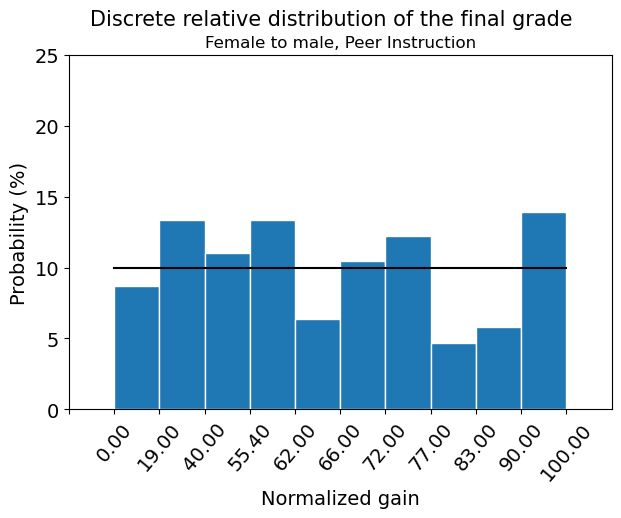

In [64]:
plt.figure(figsize=(7,4.6))
rel_disc( ( data[(data.method == 'PI + JiTT') & (data.gender == 'M') & ~data.final_grade.isna()] )['final_grade'],
          ( data[(data.method == 'PI + JiTT') & (data.gender == 'F') & ~data.final_grade.isna()] )['final_grade'], 10 )
plt.suptitle('Discrete relative distribution of the final grade', fontsize=15)
plt.title('Female to male, Peer Instruction', fontsize=12)
plt.xlabel("Normalized gain", fontsize=14)
plt.ylabel("Probability (%)", fontsize=14)
plt.tick_params(axis='x', labelsize=14, labelrotation=50)
plt.tick_params(axis='y', labelsize=14)

# Linear regression

Now, I use a linear regresion to calculate the association of gender and teaching methodology with the normalized gain and final grade.

In [73]:
filtered_data = data[['gender', 'method','normalized_gain','final_grade' ]].dropna()
x_ng1 = filtered_data[(filtered_data.method == 'T') | (filtered_data.method == 'PI + JiTT')][['gender', 'method']].astype( { 'method': 'category', 'gender': 'category' } )
x_ng1 = sm.add_constant(x21)
x_ng = pd.get_dummies(x21, drop_first=True)
y_ng = filtered_data[(filtered_data.method == 'T') | (filtered_data.method == 'PI + JiTT')]['normalized_gain'].astype(float)

In [74]:
model_ng = sm.OLS(y_ng, x_ng)
results_ng = model_ng.fit()
print(results_ng.summary())

                            OLS Regression Results                            
Dep. Variable:        normalized_gain   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     17.91
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           2.78e-08
Time:                        19:44:21   Log-Likelihood:                 63.905
No. Observations:                 603   AIC:                            -121.8
Df Residuals:                     600   BIC:                            -108.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2498      0.017     14.352      0.0

Now, I use the linear regresion to predict the impact of gender and teaching methodology in the final grade.

In [75]:
x_fg1 = filtered_data[(filtered_data.method == 'T') | (filtered_data.method == 'PI + JiTT')][['gender', 'method']].astype( { 'method': 'category', 'gender': 'category' } )
x_fg1 = sm.add_constant(x21)
x_fg = pd.get_dummies(x21, drop_first=True)
y_fg = filtered_data[(filtered_data.method == 'T') | (filtered_data.method == 'PI + JiTT')]['final_grade'].astype(float)

In [76]:
model_fg = sm.OLS(y_fg, x_fg)
results_fg = model_fg.fit()
print(results_fg.summary())

                            OLS Regression Results                            
Dep. Variable:            final_grade   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6784
Date:                Mon, 24 Jul 2023   Prob (F-statistic):              0.508
Time:                        19:45:46   Log-Likelihood:                -2662.7
No. Observations:                 603   AIC:                             5331.
Df Residuals:                     600   BIC:                             5345.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.6355      1.601     42.877      0.0